
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_path = "C:\\Users\\nlp\\Downloads\\"
house = pd.read_csv(data_path + "houseprice.csv")

In [7]:
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


In [8]:
house.describe()

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


#### 1. 주택 가격과 세금 간의 산점도 행렬과 상관계수를 구하시오. 두 변수 간의 선형관계가 존재하는가? 산점도 행렬을 보면 3개의 특이한 관측치가 나타난다. 이들 값의 특성은 무엇인가?

In [10]:
correcoef = house.corr()

In [11]:
correcoef

,price,tax,ground,floor,year
price,1.000000,0.915249,0.726335,0.928827,-0.310290
tax,0.915249,1.000000,0.686850,0.832415,-0.371172
ground,0.726335,0.686850,1.000000,0.703269,-0.380275
floor,0.928827,0.832415,0.703269,1.000000,-0.178057
year,-0.310290,-0.371172,-0.380275,-0.178057,1.000000


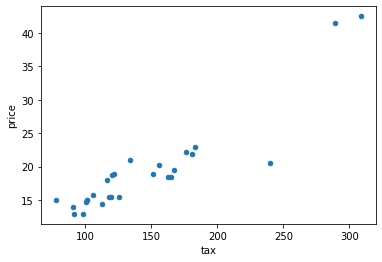

In [13]:
house.plot(x="tax", y="price", kind="scatter")
plt.show()

#### 2. 주택 가격을 종속변수로 하고 세금을 설명변수로 하는 단순선형회귀모형을 적합하여 적합된 회귀식을 쓰시오. 

In [16]:
# house["price"] = b_0 + b_1 * house["tax"] + e
model = smf.ols("price~tax", data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           2.31e-11
Time:                        18:23:21   Log-Likelihood:                -66.382
No. Observations:                  27   AIC:                             136.8
Df Residuals:                      25   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7907      1.556      1.794      0.085      -0.413       5.994
tax            0.1136      0.010     11.359      0.000       0.093       0.134
==============================================================================
Omnibus:                       11.576   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.951
Skew:                          -0.909   Prob(JB):                     0.000935
Kurtosis:                       6.016   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# y_hat = 2.7907 + 0.1136*x

# price_hat = 2.7907 + 0.1136 * tax 

In [ ]:
# tax 1 단위 증가할때 price가 0.1136 증가한다.

#### 3. tax의 계수에 대한 95% 신뢰구간을 계산하고 해석하시오. 

In [19]:
model.conf_int(alpha=0.05)

,0,1
Intercept,-0.412993,5.994431
tax,0.092995,0.134188


In [20]:
# 신뢰구간 [0.092995, 0.134188]이다. 
# tax 1단위 증가했을때,
# price의 증가량이 [0.092995, 0.134188]의 사이의 값이 가능성이 95%이다. 

#### 4. tax의 계수에 대한 가설검정을 진행하시오. 

In [21]:
# H0: beta_1 = 0
# H1: beta_1 != 0

In [22]:
# 검정 통계량: 11.359

# p-value=  0.000 < 0.05 
# 귀무가설 기각한다. beta_1이 0이 아니다.

#### 5. 모형의 R-square는 몇 인가? 그것의 의미는 무엇인가?

In [23]:
model.rsquared

0.8376815840383705

In [24]:
# Tax의 변동 중 83%가 price에 대한 선형회귀에 의해 설명된다. 

#### 6. tax가 중위수인 집의 가격을 예측하려고 한다. 신뢰구간과 예측구간을 구하고 각 구간의 의미를 해석하시오. 

In [25]:
house.tax.median()

121.86200000000001

In [27]:
pred = model.get_prediction(exog = dict(tax=house.tax.median()))
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.633213,0.610771,15.375306,17.891119,10.450429,22.815996
